In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.misc as sc

%matplotlib inline
rc('figure', figsize=(13.0, 11.0)) # easy way to re-size a figure
rc('animation', html='html5')


# Exercise 1
    

Creating a function to calculate the probabilties of each number of heads for a given number of flipped coins.  I will do this by first creating an array of all zeros.  Then, for the given number of trials, the program will produce 40 random numbers between 0 and 1.  I then count the number of heads as the total number of those randomly produced numbers less than .5, which correlates to a probability of heads to be one half.  After each trial, I update the array count to keep track of the total number of each number of heads.  Finally I divide the counts array by the number of trials to return the probability of each number of heads. 

In [35]:
N = 40 #number of coins being flipped 
k = 100000 #number of trials
p = 0.5 # setting probability to .5 for this experiment 

def find_prob(N,k,p):
    counts = np.zeros(N+1)
    for i in range (0,k):
        draw = np.random.random(size=N)
        num_heads = len(draw[np.where(draw <= p)]) #probability of .5
        num_tails = len(draw[np.where(draw > p)])
        counts[num_heads] = counts[num_heads] + 1
    return counts / k

Creating a function to calculate the Gaussian distribution of the same data as above.  This function takes in the probability and the number of coins being flipped.  It follows directly from the Binomial Thoerem, and reutrns and array of the probabilities of each number of heads. 

In [36]:
def Binomial(N,p): #Binomial Theorem Probability  
    x = (np.arange(N+1))
    Binomial = sc.factorial(N)/((sc.factorial(x)*sc.factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return Binomial

Plotting the Gaussian and Experimental probability distiburion functions.  Using the two functions above, we plot the probabilites versus the number of heads.  The plots seem to converge, so our prediction is correct.  Our data behaves as a Gaussian distribution with a large number of trials.  This also supports the Central Limit Theorem. Before we calculate the expectation value and analytical mean in the next block of code, we can prdict the value from the graph. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


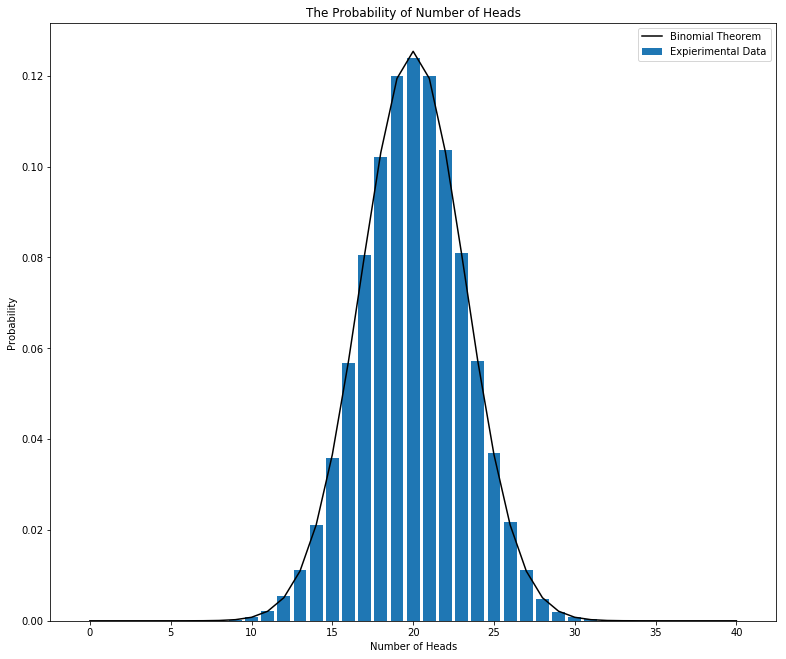

In [37]:
plt.bar(np.arange(N+1), find_prob(N,k,p), label='Expierimental Data') #plotting probabilty of "x" number of heads
plt.plot(np.arange(N+1), Binomial(N,p), '-k', label='Binomial Theorem')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('The Probability of Number of Heads')
plt.legend()


Calculating the Expectation value and analytical mean for N = 20 and N = 40.  These numbers essentailly match, which is what we expected.  When the probability is one half, the most common amount of heads flipped is just half the number of flipped heads.  Running the trial 10000 times successfully produces an expectation value equal to the analytical mean. 

In [28]:
Expec_val_20 = np.sum(find_prob(20,100000,0.5)*np.arange(20+1))
Expec_val_40 = np.sum(find_prob(40,100000,0.5)*np.arange(40+1))
mu_20 = 20 * p #N*p
mu_40 = 40 * p
print("Expectation Value for 20 coins:", Expec_val_20)
print("Analytical Mean for 20 coins:", mu_20)
print("Expectation Value for 40 coins:",Expec_val_40)
print("Analytical Mean for 40 coins:", mu_40)

Expectation Value for 20 coins: 10.0041
Analytical Mean for 20 coins: 10.0
Expectation Value for 40 coins: 19.997880000000002
Analytical Mean for 40 coins: 20.0


# Exercise 2

New Parameters for probability distribution functions 

In [29]:
N = 100 #number of coins being flipped
k = 10000 #number of trials
p = 0.05

Creating a function for the Poisson disribution.  This function follows directly from the fomula, given the number of heads being flipped and the probability of heads, the function returns an array with the proabability of each number of heads using the Poisson distribution. 

In [30]:
def Poisson(N,p):
    x = np.arange(N+1)
    Poisson = ((N*p)**x)*np.exp(-N*p)/sc.factorial(x)
    return Poisson

Plotting all three Probability Disribution Functions on the same plot for 100 coins being flipped with a .05 probability of heads.  The plot is sucessful, as it shows how all three probability distibution functions look very similar.  It is hard to even dicern between the Binomial and Poisson distributions, which solidifies our expectation that they will converge at small values of probability.  It also makes sinse that the most common number of heads is 5, because there were 100 coins flipped with a 5% chance of heads, so after 10000 trials, the expectation value makes sense. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


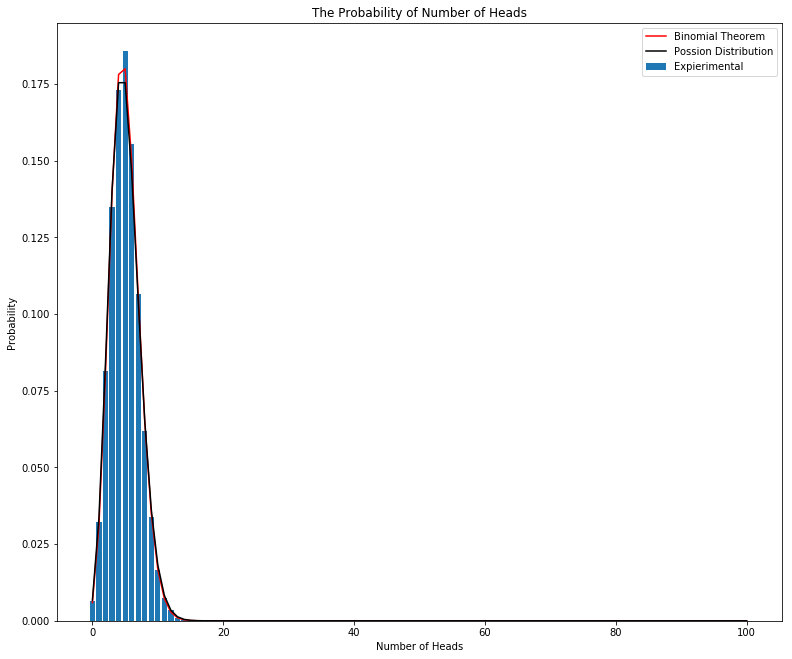

In [31]:
plt.bar(np.arange(N+1), find_prob(N,k,p), label='Expierimental')
plt.plot(np.arange(N+1), Binomial(N,p), '-r', label='Binomial Theorem')
plt.plot(np.arange(N+1), Poisson(N,p), '-k', label='Possion Distribution')
plt.ylabel('Probability')
plt.xlabel('Number of Heads')
plt.title('The Probability of Number of Heads')
plt.legend()

Calculating Expectation Value of x and x squared in order to find the Variance for a Poisson Distribution.  This value is expected, as the definition of a Poisson distribution includes that the mean and variance are the same value. 

In [32]:
exp_val_x = np.sum(Poisson(N,p)*np.arange(N+1))
exp_val_x_sqr = np.sum(Poisson(N,p)*(np.arange(N+1))**2)
var_x = exp_val_x_sqr - (exp_val_x)**2
print("Expectation Value of x:", exp_val_x)
print("Expectation Value of x squared:", exp_val_x_sqr)
print("Variance of x:", var_x)



Expectation Value of x: 5.0
Expectation Value of x squared: 30.0
Variance of x: 5.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Calculating and plotting The Variance and Expectation Value of x versus small probabilites for both a Gaussian and Poisson Distribution.  I will do this by first creating an array of equally spaced values from .001 to .301.  This will be my range of probabilities that I am plotting, and will appear on the x-axis.  The first function creates an array of the expectation value with every probability from the array above.  The second function does the same calculation, but for the expectation value of x squared.  I then run these functions to create the arrays for expectation values of x and x squared.  Now I create a final array that calculates the variance of x for every probability in the first array "prob".  Finally, I plot the expectaion value of x, or mean, and the variance of x against the range of probabilities. The plot makes sense, as we expect the expectaion value and variance to diverge as probability grows.  This supports why we can use a Poisson distribution at small values of p.  As we can see in the graph, the variance and expectation value are essentially the same up unitl about 0.05, and then they begin to diverge.  As calculated in the code block above, the variance and the expectation value for a Poisson distribution should be the same, so the Poisson distribution can successfully predict our data until these two values diverge. The graph proir to this supports this claim as well. 

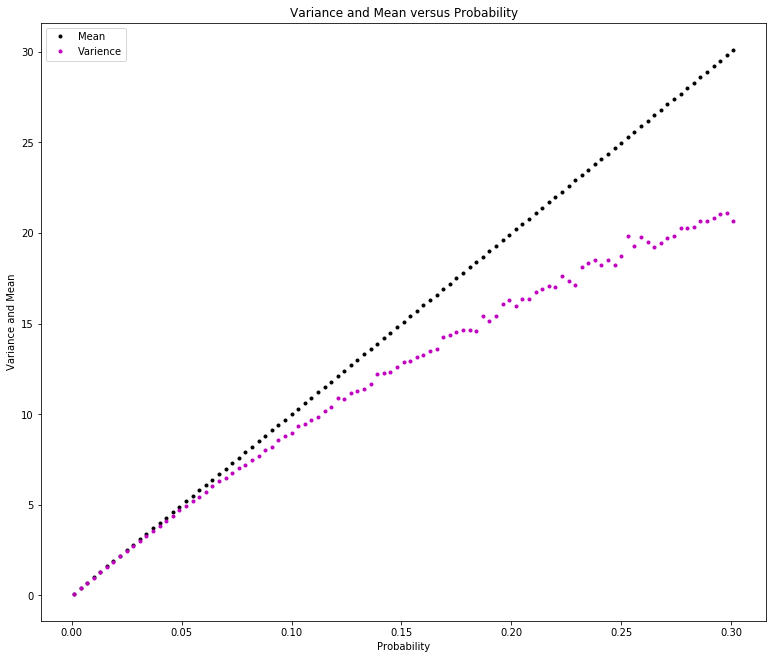

In [38]:
N = 100
k = 1000000
prob = np.linspace(.001, .301, N+1, endpoint=True) #graphing from p = .001 to p=.301
def sum_of_counts_x(N,k):
    sum = np.zeros(N+1)
    for i,p in enumerate(prob):
        sum[i] = np.sum(find_prob(N,k,p)*np.arange(N+1))
        i += 1
    return sum

def sum_of_counts_x_sqr(N,k):
    sum = np.zeros(N+1)
    for i,p in enumerate(prob):
        sum[i] = np.sum(find_prob(N,k,p)*(np.arange(N+1))**2)
        i += 1
    return sum

exp_val_x = sum_of_counts_x(N,k)
exp_val_x_sqr = sum_of_counts_x_sqr(N,k)
Var_x = np.array(exp_val_x_sqr - (exp_val_x)**2)

plt.plot(prob, exp_val_x, 'k.', label='Mean')
plt.plot(prob, Var_x, 'm.', label='Varience')
plt.xlabel('Probability')
plt.ylabel('Variance and Mean')
plt.title('Variance and Mean versus Probability')
plt.legend()